<a href="https://colab.research.google.com/github/Kengmo75/Python-Regression/blob/main/HR_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Introduction
In this notebook, I will perform analysis on a dataset that contains information about employees and their attrition status. My objective will be to perform in-depth data exploration to gain insights into factors contributing to employee attrition.


The dataset was checked to ensure that there are no missing values nor inappropriate datatypes

# 1. Importing all relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# *2*. Loading the dataset
I will be using python's pandas library to Load the dataset into a dataframe and I will further display the first few rows to understand the structure of the data.

In [2]:
# Load the dataset
data = pd.read_csv('https://drive.google.com/uc?id=1BlxVDQw6hyra_TT2FZruhOsAFEGgH2JE')

# Display the first few rows
print(data.head())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

# 3. Summary Statistics
I will be using the describe() method to generate summary statistics for numeric columns.

In [3]:
# Summary statistics
print(data.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

# 4. Age VS Employees
I will use matplotlib to create a histogram that will illustrate the distribution of age amongst employees.

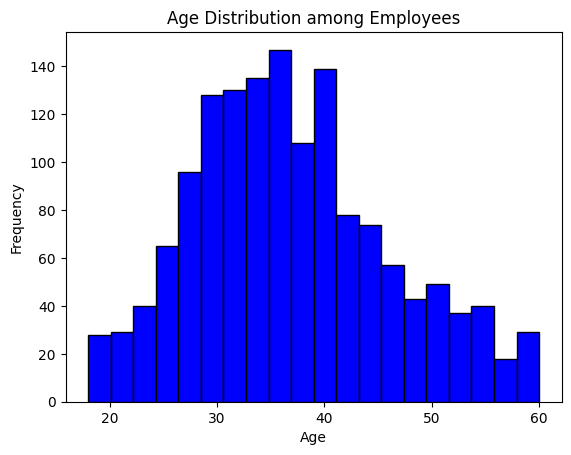

In [9]:
# Histogram for age distribution
plt.hist(data['Age'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution among Employees')
plt.show()


Looking at the above histogram, it is safe to say that most employees in the company are between the ages of 30 and 40.

# 5. Employees Vs Department
I will use pandas to group the data by department and a barplot will be created to depict the relationship between employees and department and this will be aggregated by the count of employees in each department.

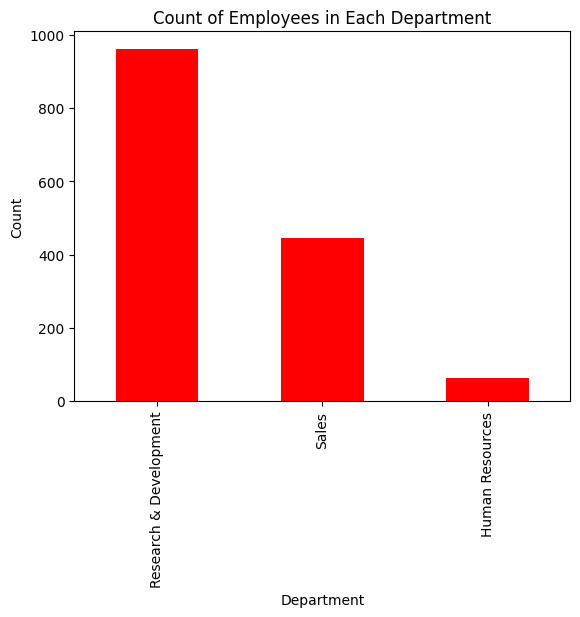

In [6]:
# Bar plot for department count
department_counts = data['Department'].value_counts()
department_counts.plot(kind='bar', color='red')
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Count of Employees in Each Department')
plt.show()

Based on the barplot between employees and department, we can clearly see that the department with least employees is human resources while most employees in the company are either too interested in Research and development or the company needs more employees in this department. The sales department has a count of about 450 employees which surpasses the Human resources department by approximately 400 employees and is surpassed by the research and development department by approximately 500 employees.

# 6. TotalWorkingHours Vs MonthlyIncome
I will be using seaborn to create a scatter plot which will illustrate the relationship between employee's tota working years and income earned by the end of the month.

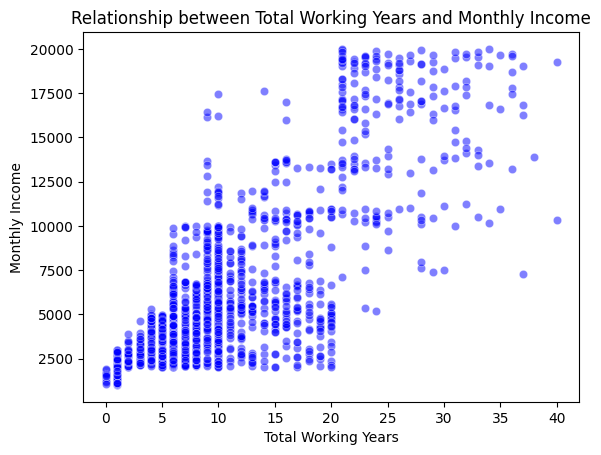

In [8]:
# Scatter plot for TotalWorkingYears vs MonthlyIncome
sns.scatterplot(x = 'TotalWorkingYears', y='MonthlyIncome', data = data, alpha = 0.5, color = 'blue')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.title('Relationship between Total Working Years and Monthly Income')
plt.show()

We can clearly visualize from the scattered plot that more experienced employees in the company earn more monthly compared to least experienced employees. Salary ranges are higher for employees who have worked for more years in the company and by more years I mean 20 years upwards.

# 7. Attrition Rate Among Different Job Roles
I will do this by first grouping the data by job role, then the attrition rate will be calculated and the resulting data will be visualized as a stacked bar plot.  The attrition rate is calculated as the proportion of 'Yes' (attrition occurred) out of the total occurrences of 'Yes' and 'No' for each job role.


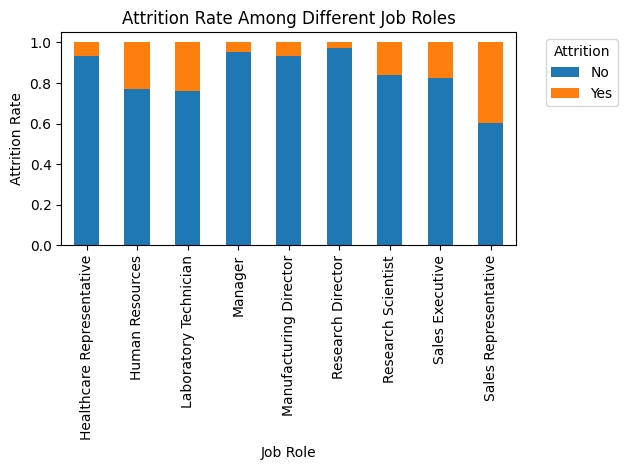

In [11]:
# Bar plot for attrition rate among job roles
attrition_rate = data.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack()
attrition_rate.plot(kind='bar', stacked=True)
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate Among Different Job Roles')
plt.legend(title='Attrition')
# Moving the legend to the side
plt.legend(title='Attrition', bbox_to_anchor=(1.05, 1), loc='upper left')
# Adjusting the layout to prevent clipping of the legend
plt.tight_layout()
plt.show()

In the provided code snippet and analysis, the term "attrition rate" specifically refers to the proportion of employees who have left their jobs ("Yes" category) compared to those who have not ("No" category) within different job roles. This analysis aims to understand and visualize how attrition varies across different job roles within the company and based off our findings we can clearly see that most employees accross various job roles HAVE NOT left their jobs. Attrition rate is generally low accross all job types, except for the Sales Representative role where we can see a slight balance between employees who have left and those who haven't.

It is also worth noting the Research Director and Manager roles with very low attrition rates. This says alot about these roles within the company.

# 8. Average MonthlyIncome for Males Vs Females
I will do this by grouping the data by data, then the average monthly income will be calculated. The resulting data will be visualized in a bar plot. The average monthly income will be calculated using the mean() command.

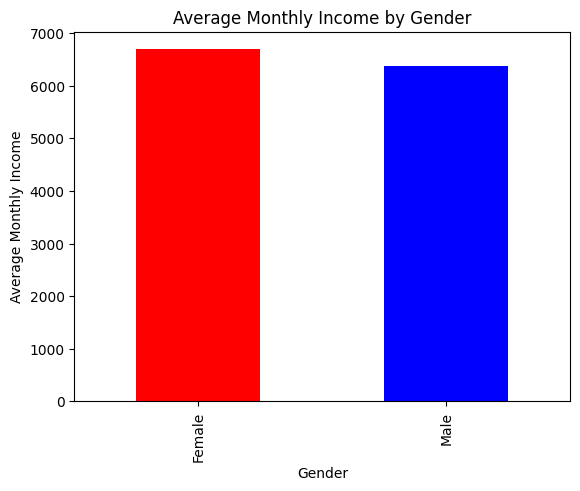

In [13]:
# Bar plot for average monthly income by gender
avg_income_gender = data.groupby('Gender')['MonthlyIncome'].mean()
avg_income_gender.plot(kind='bar', color=['red', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Average Monthly Income')
plt.title('Average Monthly Income by Gender')
plt.show()

Looking at the bar plot, we notice that the females certainly averagely earn more monthly than males, however, the variation is not very wide. Females earn approximately 6800 averagely in a month while males earn approximately 6500. The is a slight difference of 300.

# 9. Heatmap of Age Vs YearsWithCurrManager
I will use a seaborn's heatmap to create and explore a correlation between age and years with curr manager.

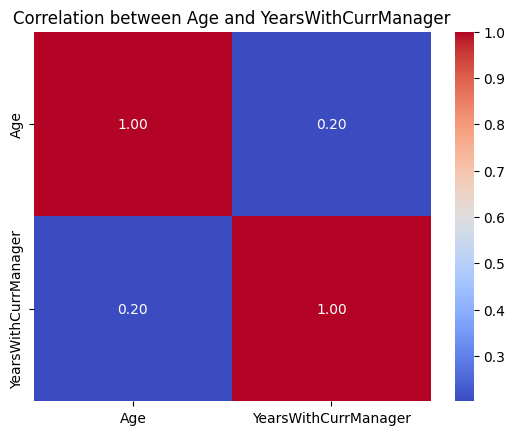

In [14]:
# Heatmap for correlation between Age and YearsWithCurrManager
correlation_matrix = data[['Age', 'YearsWithCurrManager']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Age and YearsWithCurrManager')
plt.show()


Looking at the heatmap and the correlation between age and yearswithcurrmanager, we notice that there is a very strong correlation between these two variables. The darker shades in the diagonal and the correlation coefficients help us understand that both variables are directly related, thus as age increases, yearswithcurrmanager will increase and vice versa.

# 10. Results, Findings and Conclusion
After exploring and analysing this dataset, i have made the various findings;
- Most employees in the company are between the ages of 30 and 40. This is good age group for a working population.
- Majority of employees in the company are working in the Research and development department with greater than 800 employees, probably because more work needs to be done in this sector while the human resource department is the department with least employeed individuals with less than 100 employees.
- Employees who have stayed 20 years and more in the company generally make more money monthly compared to employees who have less than 20 years experience in the company.
- Attrition rate is generally low accross all job roles, specifically in the Manager and Research director roles with extremely low attrition rates. However, it is worth noting the Sales Representative, Human Resource and Laboratory Technician roles with slightly higher attrition rates compared to other roles.
- There is just a very slight difference in average monthly income of 300 between male and female employees.
- There is positive correlation and a strong relationship with age and yearswithcurrmanager.